In [22]:
# import
from cifardef import *
from lenet5 import *
from PIL import Image  
import torch,math,os
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [26]:
PATH='Lenet10.pkl'
model = lenet5(3,10)
if os.path.isfile(PATH):
    model.load_state_dict(torch.load(PATH))
    print(model.eval())
else:
    print('No model')
log=open(PATH.split('.')[0]+'.log','a')
best_acc=0
cuda_gpu = torch.cuda.is_available()
if cuda_gpu:
    model = model.cuda()

RuntimeError: Error(s) in loading state_dict for lenet5:
	Unexpected key(s) in state_dict: "l1.2.weight", "l1.2.bias", "l1.2.running_mean", "l1.2.running_var", "l1.2.num_batches_tracked", "l2.2.weight", "l2.2.bias", "l2.2.running_mean", "l2.2.running_var", "l2.2.num_batches_tracked". 
	size mismatch for l1.0.weight: copying a param with shape torch.Size([6, 3, 11, 11]) from checkpoint, the shape in current model is torch.Size([6, 3, 3, 3]).

In [3]:
batch_size = 128
learning_rate = 0.01
num_epoches = 1000

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，在吧图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_dataset = cifar_10('data/cifar-10-batches-py',
                        train=False, transform=transform_test)
meta=unpickle('data/cifar-10-batches-py/batches.meta')

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_datasetList = [ cifar_10('data/cifar-10-batches-py',
                         train=True, transform=transform_train,index=i+1) for i in range(5)]
train_loaderList=[DataLoader(t, batch_size=batch_size, shuffle=True) for t in train_datasetList]

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4) #优化方式为mini-batch momentum-SGD，并采用L2正则化（权重衰减）





In [4]:
res={}
epoch=1

In [ ]:
epochs=200

while real_epoch<=epochs:
    print('Train Epoch: {}/{}:'.format(epoch,epochs))
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t,log)
    if(epoch%(1)==0):
        acc, loss = test(model, 1, criterion, test_loader,log)
    epoch+=1

torch.save(model.state_dict(),PATH)
log.close()

Train Epoch: 1/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.280154
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.296269
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.297452
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.821688
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.043881

Test set: Average loss: 1.9474, Accuracy: 2934/10000 (29%)
Train Epoch: 2/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.643064
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.667260
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.800384
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.889267
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 2.054742

Test set: Average loss: 1.7926, Accuracy: 3555/10000 (36%)
Train Epoch: 3/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.744999
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.443986
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.822229
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.823811
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.694647

Test set:

Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.869875
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.439947
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.198881

Test set: Average loss: 1.1369, Accuracy: 5970/10000 (60%)
Train Epoch: 25/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.848791
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.324413
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.127230
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.458015
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.282577

Test set: Average loss: 1.1238, Accuracy: 6039/10000 (60%)
Train Epoch: 26/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.647280
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.516917
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.523577
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.101692
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 1.277556

Test set: Average loss: 1.1176, Accuracy: 6054/10000 (61%)
Train Epoch: 27/200:
Train Epoch: 1000 [10000/10000 (100%)]	Loss: 0.642860
T

In [15]:
torch.save(model.state_dict(), PATH)

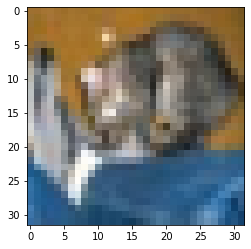

b'cat' , b'cat'


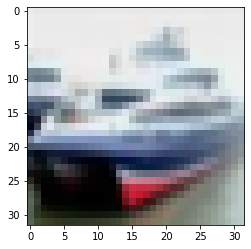

b'automobile' , b'ship'


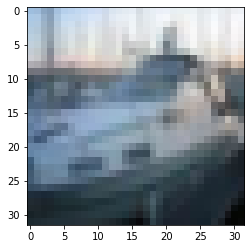

b'ship' , b'ship'


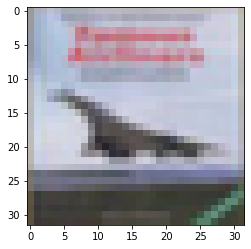

b'airplane' , b'airplane'


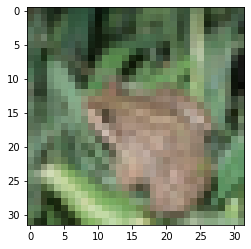

b'frog' , b'frog'


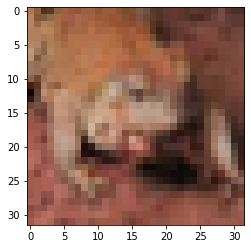

b'frog' , b'frog'


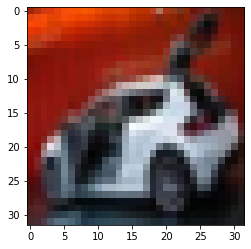

b'automobile' , b'automobile'


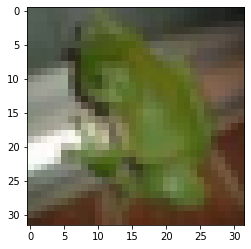

b'frog' , b'frog'


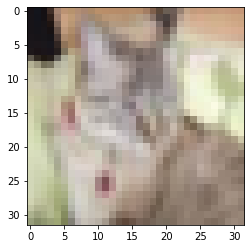

b'cat' , b'cat'


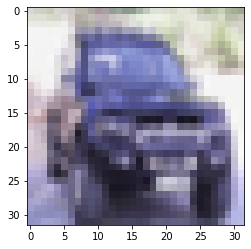

b'automobile' , b'automobile'


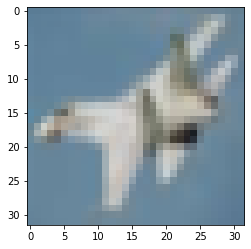

b'deer' , b'airplane'


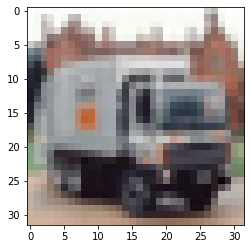

b'truck' , b'truck'


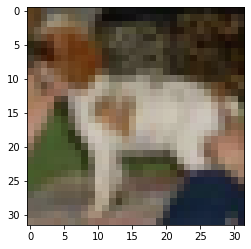

b'dog' , b'dog'


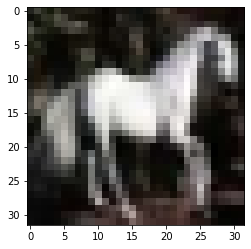

b'horse' , b'horse'


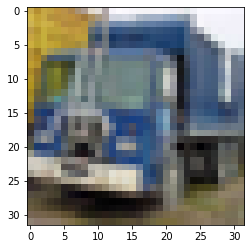

b'truck' , b'truck'


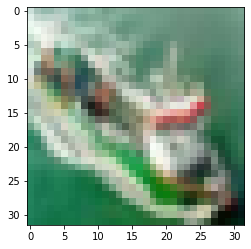

b'ship' , b'ship'


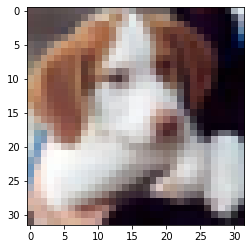

b'dog' , b'dog'


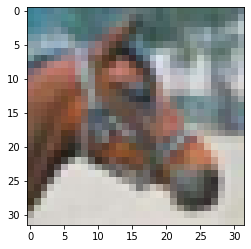

b'cat' , b'horse'


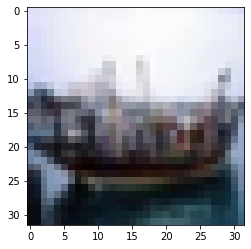

b'ship' , b'ship'


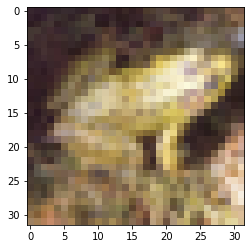

b'frog' , b'frog'


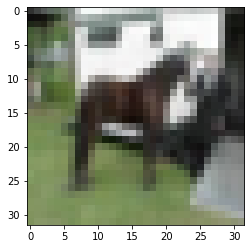

b'horse' , b'horse'


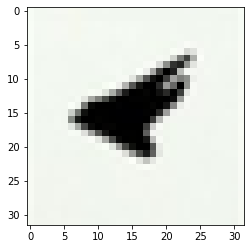

b'bird' , b'airplane'


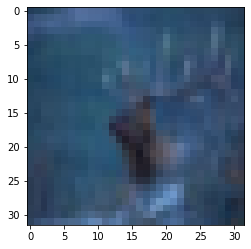

b'bird' , b'deer'


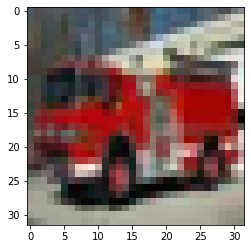

b'truck' , b'truck'


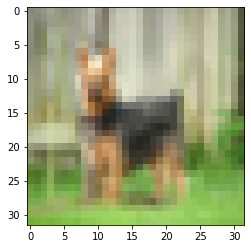

b'deer' , b'dog'


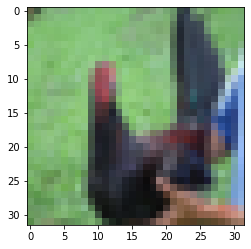

b'deer' , b'bird'


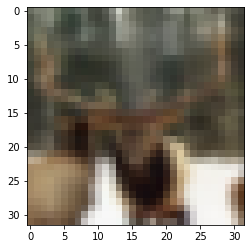

b'cat' , b'deer'


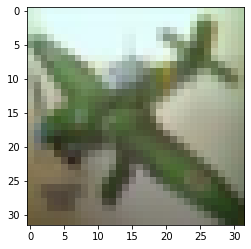

b'bird' , b'airplane'


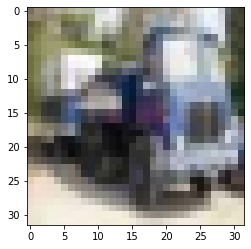

b'automobile' , b'truck'


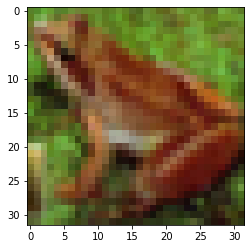

b'frog' , b'frog'


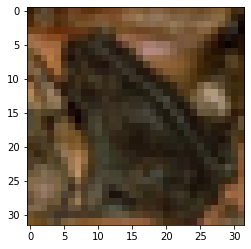

b'frog' , b'frog'


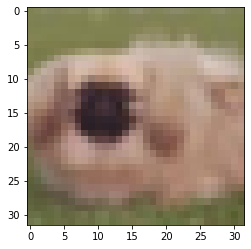

b'dog' , b'dog'


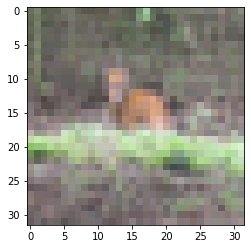

b'frog' , b'deer'


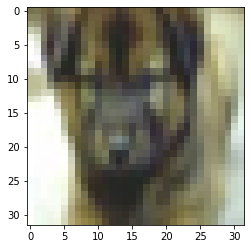

b'cat' , b'dog'


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [8]:
test_visual(model,'data/cifar-10-batches-py',meta,transform_test)

In [18]:
test(model, 1, nn.CrossEntropyLoss(), test_loader)


Test set: Average loss: 1.0922, Accuracy: 6104/10000 (61%)


(tensor(0.6104), tensor(1.0922, device='cuda:0'))

In [23]:
log.close()